In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import History 
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from tqdm import tqdm
from PIL import Image
import urllib.request
import requests
from urllib.request import urlopen
from io import BytesIO
import cv2
seed = 15
import gc


Using TensorFlow backend.


In [2]:
data = pd.read_csv("album_covers_genres.csv")
data = data.dropna(subset=["img_url"])
data.head()


,Unnamed: 0,albName,artist,genre,img_url
0,0,Classical Chillout,Various Artists,classical,https://i.scdn.co/image/ab67616d0000b2733d0e7a...
1,1,Schubert: Des fragments aux étoiles,Franz Schubert and Shani Diluka,classical,https://i.scdn.co/image/ab67616d0000b273c4a211...
2,2,Maurizio Pollini - Schumann Complete Recordings,Robert Schumann and Maurizio Pollini,classical,https://i.scdn.co/image/ab67616d0000b27371740d...
3,3,"Beethoven: ""Razumovsky"" Quartets VII, VIII & I...",Ludwig van Beethoven and Tokyo String Quartet,classical,https://i.scdn.co/image/ab67616d0000b273d7f474...
4,4,"Sibelius: Pelleas and Melisande Suite, Musik z...",Jean Sibelius and Turku Philharmonic Orchestra...,classical,https://i.scdn.co/image/ab67616d0000b273322f89...


In [3]:
genres = [
    "classical",
    "country",
    "edm",
    "gospel",
    "heavy-metal",
    "hip-hop",
    "jazz",
    "pop",
    "r-n-b",
    "rock"]

In [4]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [5]:
images = []
for i, row in data.iterrows():
    #response = requests.get(row["img_url"])
    #img = Image.open(BytesIO(response.content))
    img = url_to_image(row["img_url"])
    img = cv2.resize(img, (640, 640))
    img = img_to_array(img)
    images.append(img)
    #images.append(np.array(img))
images_scaled = np.array(images, dtype="float") / 255.0
#images = np.array(images)
gc.collect()

97

In [6]:

codes = {"classical":0, "country":1, "edm":2,  
         "gospel":3,"heavy-metal":4, "hip-hop":5, 
        "jazz":6, "pop":7, "r-n-b":8, "rock":9}
data["genre"] = data["genre"].map(codes)


In [7]:
labels = np.array(data["genre"])

In [8]:
#images=np.asarray(images).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(images_scaled, labels, train_size = 0.8, random_state=92)

In [9]:
X_train.shape

(799, 640, 640, 3)

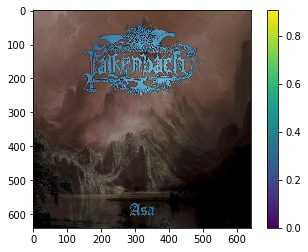

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

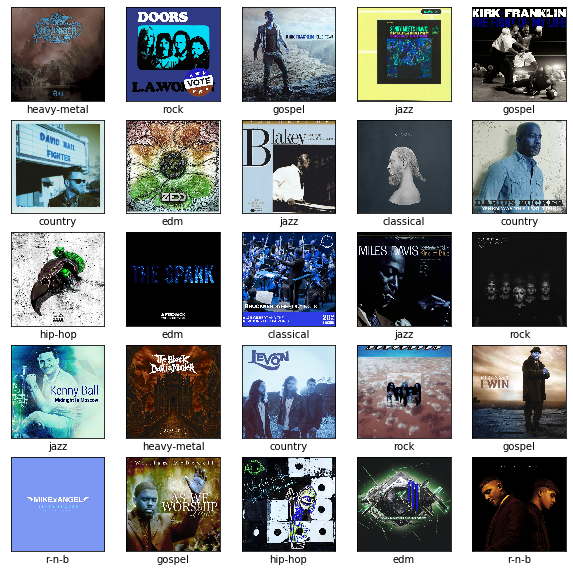

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(genres[np.argmax(y_train[i])])
plt.show()

In [13]:
num_classes = 10

model = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(640, 640, 3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
  
])

In [14]:
from tensorflow import keras
optimizer = keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 640, 640, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 640, 640, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 640, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 640, 640, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 320, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 320, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 160, 32)      0

In [16]:
gc.collect()

42142

In [17]:

history = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
23/23 [==============================] - 124s 5s/step - loss: 2.3081 - accuracy: 0.1029 - val_loss: 2.3153 - val_accuracy: 0.0875
Epoch 2/50
23/23 [==============================] - 115s 5s/step - loss: 2.3015 - accuracy: 0.1154 - val_loss: 2.3098 - val_accuracy: 0.1125
Epoch 3/50
23/23 [==============================] - 114s 5s/step - loss: 2.2910 - accuracy: 0.1293 - val_loss: 2.3213 - val_accuracy: 0.0875
Epoch 4/50
23/23 [==============================] - 115s 5s/step - loss: 2.2747 - accuracy: 0.1377 - val_loss: 2.2964 - val_accuracy: 0.0750
Epoch 5/50
23/23 [==============================] - 113s 5s/step - loss: 2.2731 - accuracy: 0.1516 - val_loss: 2.4221 - val_accuracy: 0.1375
Epoch 6/50
23/23 [==============================] - 114s 5s/step - loss: 2.2482 - accuracy: 0.1641 - val_loss: 2.3337 - val_accuracy: 0.1125
Epoch 7/50
23/23 [==============================] - 118s 5s/step - loss: 2.2391 - accuracy: 0.1627 - val_loss: 2.3619 - val_accuracy: 0.1625
Epoch 8/50
23

In [18]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 6s - loss: 4.4680 - accuracy: 0.2100

Test accuracy: 0.20999999344348907


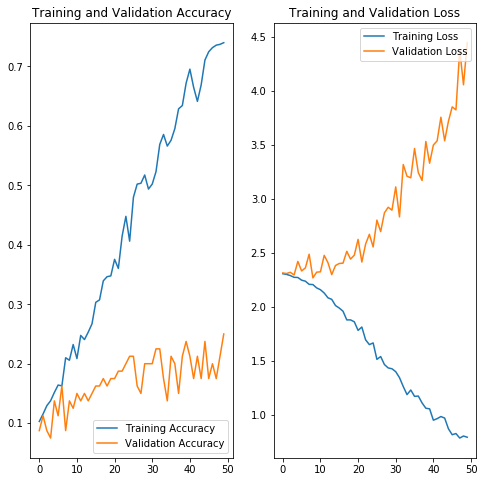

In [19]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(X_test)
predictions[0]

array([0.06196812, 0.13021526, 0.02247345, 0.00741478, 0.02793707,
       0.00996854, 0.01570421, 0.10544712, 0.11681275, 0.50205874],
      dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(genres[predicted_label],
                                100*np.max(predictions_array),
                                genres[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  #true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

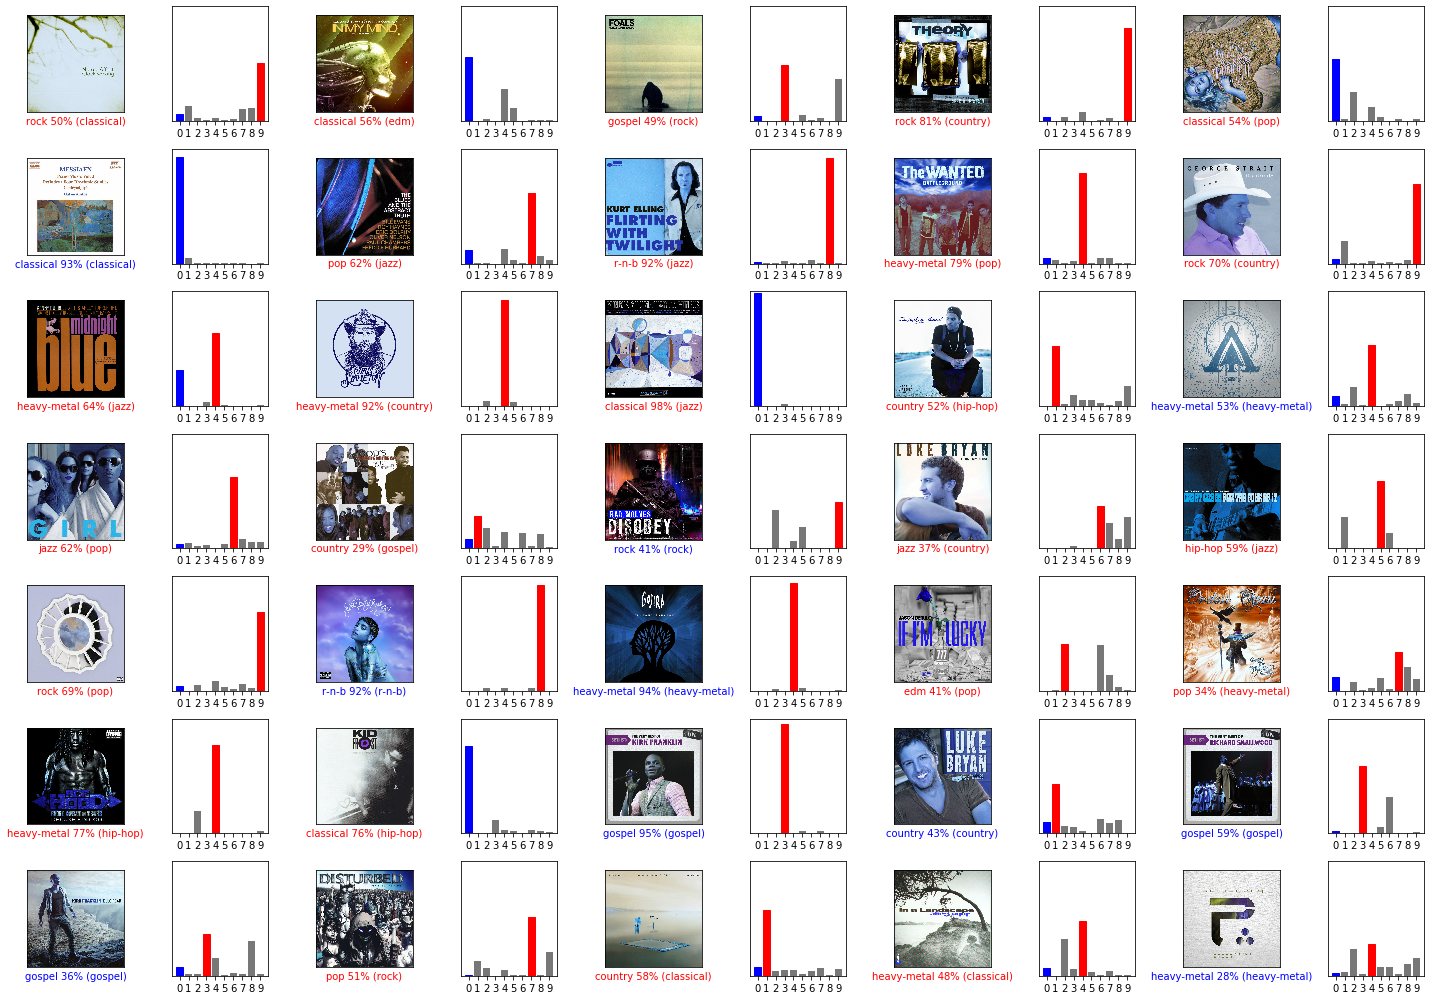

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], np.argmax(y_test[i]))
plt.tight_layout()
plt.show()

genres = [
    "blues",
    "classical",
    "country",
    "edm",
    "folk",
    "gospel",
    "heavy-metal",
    "hip-hop",
    "indie",
    "jazz",
    "metal",
    "pop",
    "r-n-b",
    "rock",
    "singer-songwriter"]

In [43]:
model.save("genre_pred_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: genre_pred_model/assets


In [97]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow import keras
img_height, img_width = (224,224)
base_model = ResNet101(include_top = False, weights= 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation = 'relu')(x)
predictions = layers.Dense(15, activation= "softmax")(x)
model_resnet = keras.Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model_resnet.compile(optimizer="adam", loss ="categorical_crossentropy", metrics=["accuracy"])

In [98]:
model_resnet.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [99]:
model_resnet.fit(X_train, y_train, epochs = 10)

Epoch 1/10
25/25 [==============================] - 543s 22s/step - loss: 4.1772 - accuracy: 0.0648
Epoch 2/10
25/25 [==============================] - 505s 20s/step - loss: 2.9033 - accuracy: 0.0915
Epoch 3/10
25/25 [==============================] - 498s 20s/step - loss: 2.8094 - accuracy: 0.1144
Epoch 4/10
25/25 [==============================] - 476s 19s/step - loss: 2.7445 - accuracy: 0.1118
Epoch 5/10
25/25 [==============================] - 474s 19s/step - loss: 2.7039 - accuracy: 0.1055
Epoch 6/10
25/25 [==============================] - 469s 19s/step - loss: 2.6483 - accuracy: 0.1182
Epoch 7/10
25/25 [==============================] - 474s 19s/step - loss: 2.6080 - accuracy: 0.1398
Epoch 8/10
25/25 [==============================] - 472s 19s/step - loss: 2.6389 - accuracy: 0.1309
Epoch 9/10
25/25 [==============================] - 473s 19s/step - loss: 2.6079 - accuracy: 0.1360
Epoch 10/10
25/25 [==============================] - 466s 19s/step - loss: 2.6348 - accuracy: 0.1169

In [100]:
test_loss, test_acc = model_resnet.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

9/9 - 142s - loss: 2.7631 - accuracy: 0.0570

Test accuracy: 0.057034220546483994
